**Prática de Suavização de Imagens**

(filtro passa baixa)

Exercícios retirados de:
http://homepages.inf.ed.ac.uk/rbf/HIPR2/mean.htm

http://homepages.inf.ed.ac.uk/rbf/HIPR2/gsmooth.htm

http://homepages.inf.ed.ac.uk/rbf/HIPR2/median.htm

1)	Aplique o filtro de Média a imagem abaixo para diferentes tamanhos de máscaras.
- 3x3; 7x7; 3x3 aplicado três vezes sequenciais.

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def print_images(labels, images, _figsize=(10, 10)):
    """
        Function to plot a set of images
    :param labels: the labels
    :param images: the images
    :param _figsize: the size of the figure
    :return: None
    """
    # assert labels.shape == images.shape
    f, axarr = plt.subplots(labels.shape[0], labels.shape[1], figsize=_figsize)

    rows, cols = labels.shape
    # Check the dimension of axarr and adjust accordingly
    if rows == 1 and cols == 1:
        axarr = np.array([[axarr]])  # Convert to 2D array
    elif rows == 1 or cols == 1:
        axarr = axarr.reshape(rows, cols)  # Convert to 2D array

    for i in range(labels.shape[0]):
        for j in range(labels.shape[1]):
            axarr[i, j].set_title(labels[i, j])
            axarr[i, j].imshow(images[i, j], cmap='gray', vmin=0, vmax=255)

In [4]:

"""
ALL:
We can define correlation and convolution so that every element of w (instead of just its center) visits every pixel in f. This requires that the starting configuration be such that the right, lower corner of the kernel coincides with the origin of the image. Similarly, the ending configuration will be with the top left corner of the kernel coinciding with the lower right corner of the image. If the kernel and image are of sizes m × n and M × N, respectively, the padding would have to increase to (m − 1) pad- ding elements above and below the image, and (n − 1) elements to the left and right.
"""
"""
CENTER:
For a kernel of size m × n, we pad the image with a minimum of (m − 1)/2 rows of 0’s at
the top and bottom and (n − 1)/2 columns of 0’s on the left and right.
"""
# Rafael C. Gonzales and Paul Wintz. 1987. Digital image processing (2nd ed.). Addison-Wesley Longman Publishing Co., Inc., USA.

def _padding(img, kernel_size):
    """
        Function to pad an image with zeros based on the kernel size
    :param img: the image to be padded
    :param kernel_size: tuple (m, n). Remember m = 2a +1, n = 2b + 1
    :return: the padded image
    """
    pad_ud = int((kernel_size[0] - 1) / 2)
    pad_lr = int((kernel_size[1] - 1) / 2)
    l_img = np.pad(img, ((pad_ud, pad_ud), (pad_lr, pad_lr)), 'constant', constant_values=0)
    return l_img

# simple test
k3 = (3, 3)
img = np.array([[1, 2, 3], [1, 3, 4], [3, 5, 6]])
padded = _padding(img, k3)
print(img)
print(padded)



[[1 2 3]
 [1 3 4]
 [3 5 6]]
[[0 0 0 0 0]
 [0 1 2 3 0]
 [0 1 3 4 0]
 [0 3 5 6 0]
 [0 0 0 0 0]]


In [5]:
def convolution(img, kernel):
    """
        Function to apply convolution to an image
    :param img: the image to be convoluted
    :param kernel: the kernel to be used
    :return: the convoluted image
    """
    # get the kernel size
    k1, k2 = kernel.shape
    # get the image size
    i1, i2 = img.shape
    # create a new image with the same size of the original
    new_img = np.zeros((i1, i2))
    # pad the image ( I am considering symmetric padding - square kernel)
    l_padded = _padding(img, kernel.shape)
    # apply convolution
    for i in range(i1):
        for j in range(i2):
            new_img[i, j] = np.sum(l_padded[i:i + k1, j:j + k2] * kernel)

    return new_img

In [6]:
# KERNELS
def mean_kernel(size):
    """
        Function to create a mean kernel
    :param size: tuple (m, n). Remember m = 2a +1, n = 2b + 1
    :return: the mean kernel
    """
    return np.ones(size) / (size[0] * size[1])


def gaussian_kernel(size, sigma=1, K=1):
    """
        Function to create a gaussian kernel
    :param K: constant multiplier
    :param sigma: standard deviation
    :param size: tuple (m, n). Remember m = 2a +1, n = 2b + 1
    :return: the gaussian kernel
    """
    # create the kernel
    kernel = np.zeros(size)
    # get the center of the kernel
    center = (int((size[0] - 1) / 2), int((size[1] - 1) / 2))
    # fill the kernel
    for i in range(size[0]):
        for j in range(size[1]):
            kernel[i, j] = K * np.exp(-((i - center[0]) ** 2 + (j - center[1]) ** 2) / (2 * sigma ** 2))
    # normalize the kernel
    kernel /=  np.sum(kernel)
    return kernel


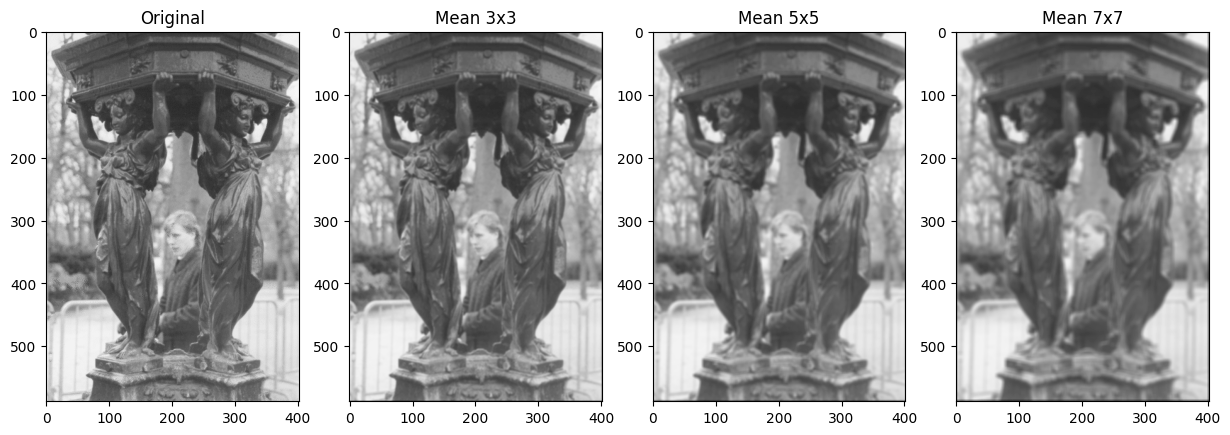

In [7]:
# Mean for 3x3, 5x5, 7x7

img1 = cv2.imread("sta2.png", cv2.IMREAD_GRAYSCALE)
new_img3 = convolution(img1, mean_kernel((3,3)))
new_img5 = convolution(img1, mean_kernel((5,5)))
new_img7 = convolution(img1, mean_kernel((7,7)))

# Printing
images = np.array([[img1, new_img3, new_img5, new_img7]])
labels = np.array([['Original', 'Mean 3x3', 'Mean 5x5', 'Mean 7x7']])
print_images(labels, images, _figsize=(15, 15))


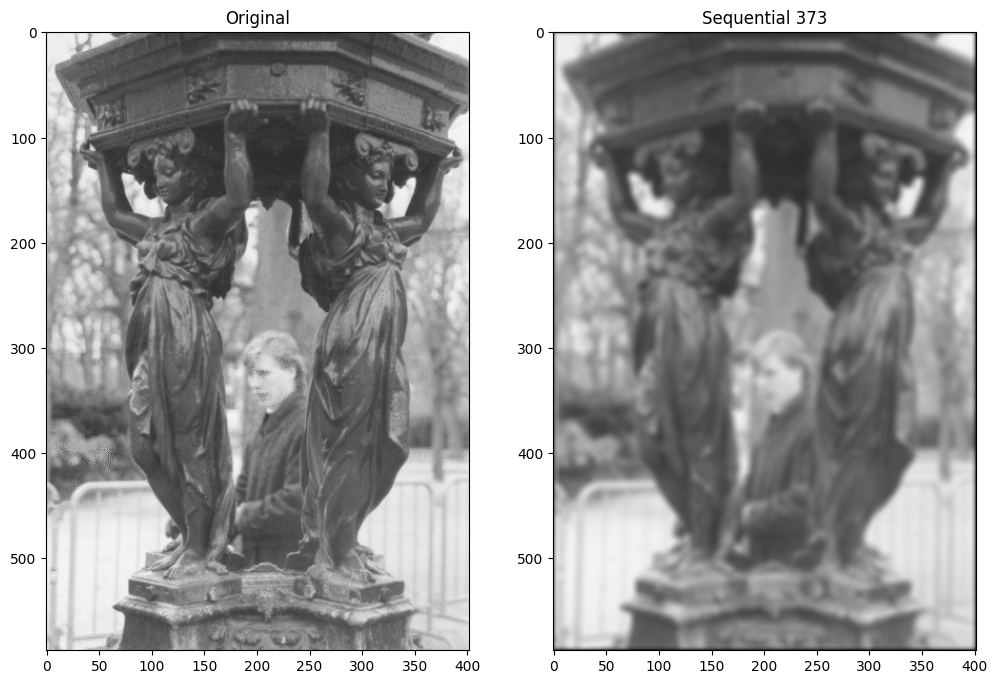

In [120]:
# Aplicado sequencialmente
new_img3 = convolution(img1, mean_kernel((3, 3)))
new_img7 = convolution(new_img3, mean_kernel((7, 7)))
new_img3 = convolution(new_img7, mean_kernel((3, 3)))

# Printing
images = np.array([[img1, new_img3]])
labels = np.array([['Original', 'Sequential 373']])
print_images(labels, images, _figsize=(12, 12))

2)	Aplique o filtro Gaussiano à imagem abaixo para diferentes valores de desvio padrão (σ) e tamanho de máscara.
- σ = 1.0 (kernel size 5×5).	σ = 2.0 (kernel size 9×9).	σ =  4.0 (kernel size 15×15).

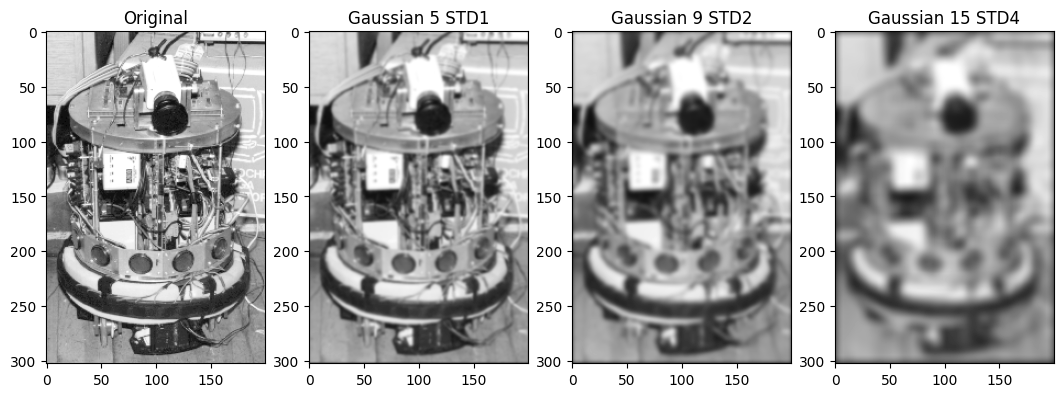

In [123]:
#  code here
img2 = cv2.imread("ben2.png", cv2.IMREAD_GRAYSCALE)

# Gaussian Filter
new_img_gaussian5 = convolution(img2, gaussian_kernel((5, 5), 1))
new_img_gaussian9 = convolution(img2, gaussian_kernel((9, 9), 2))
new_img_gaussian15 = convolution(img2, gaussian_kernel((15, 15), 4))

# Printing
images = np.array([[img2, new_img_gaussian5, new_img_gaussian9, new_img_gaussian15]])
labels = np.array([['Original', 'Gaussian 5 STD1', 'Gaussian 9 STD2', 'Gaussian 15 STD4']])
print_images(labels, images, _figsize=(13, 13))


3)	Aplique o filtro de Mediana para a imagem abaixo, que apresenta um ruído *salt and pepper*
-	3×3 filter;	7×7 filter

In [124]:

def median(img, kernel):
    """
        Function to apply median filter to an image
    :param img: the image to be filtered
    :return: the filtered image
    """
    # get the image size
    i1, i2 = img.shape
    # create a new image with the same size of the original
    new_img = np.zeros((i1, i2))
    # pad the image ( I am considering symmetric padding - square kernel)
    l_padded = _padding(img, (kernel[0], kernel[1]))
    # apply median filter
    for i in range(i1):
        for j in range(i2):
            new_img[i, j] = np.median(l_padded[i:i + kernel[0], j:j + kernel[1]])

    return new_img

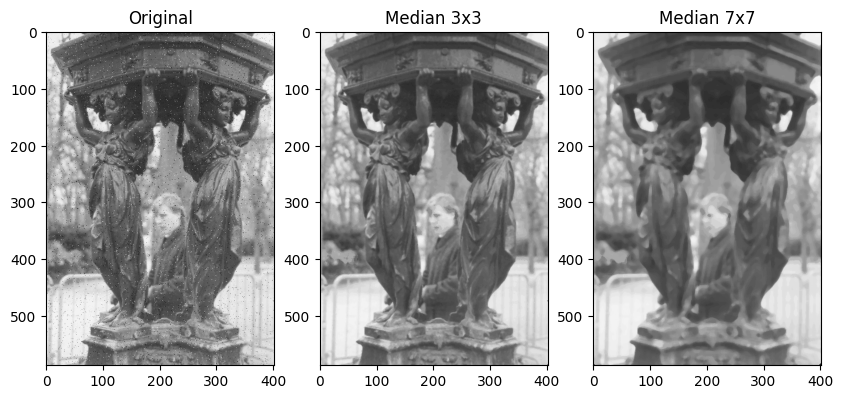

In [127]:
#  code here
img3 = cv2.imread("sta2noi2.png", cv2.IMREAD_GRAYSCALE)
img_median3 = median(img3, (3, 3))
img_median7 = median(img3, (7, 7))
# Printing
images = np.array([[img3, img_median3, img_median7]])
labels = np.array([['Original', 'Median 3x3', 'Median 7x7']])
print_images(labels, images, _figsize=(10, 10))

4)	Aplique o filtro de Mediana para a imagem abaixo, que apresenta um ruído salt and pepper
- 3×3 filter;	7×7 filter

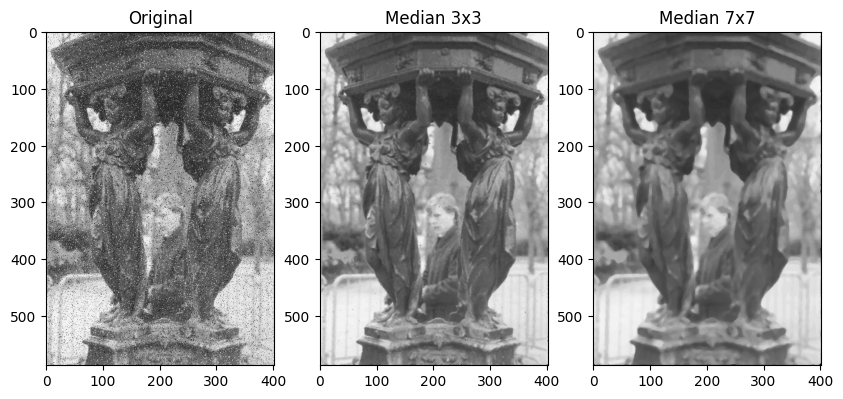

In [128]:
#  code here
img3 = cv2.imread("sta2noi1.png", cv2.IMREAD_GRAYSCALE)
img_median3 = median(img3, (3, 3))
img_median7 = median(img3, (7, 7))
# Printing
images = np.array([[img3, img_median3, img_median7]])
labels = np.array([['Original', 'Median 3x3', 'Median 7x7']])
print_images(labels, images, _figsize=(10, 10))